Epoch 1/200


c:\python3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7687.7485 - mae: 87.0612 - val_loss: 7421.2578 - val_mae: 85.5234
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7437.7695 - mae: 85.6117 - val_loss: 7147.4336 - val_mae: 83.9048
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7119.8818 - mae: 83.7354 - val_loss: 6778.8750 - val_mae: 81.6747
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6686.8711 - mae: 81.0989 - val_loss: 6267.9326 - val_mae: 78.4813
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6091.3896 - mae: 77.3396 - val_loss: 5582.1328 - val_mae: 73.9623
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5310.0693 - mae: 72.0772 - val_loss: 4710.0410 - val_mae: 67.7529
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4356.7036 - mae: 65.0743 - val_loss: 3699.4421 - val_mae: 59.6520
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3302.8423 - mae: 56.1361 - val_loss: 2654.6321 - val_mae: 49.7881
Epoch 9/200

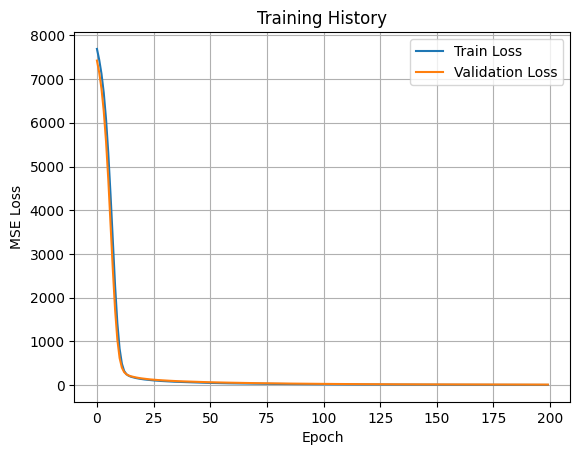

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv("d:/data/health/health_data.csv")
X = df.drop(columns=["score"])
y = df["score"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split = 0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose = 1
)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

model.save("d:/data/health/health_score_model.keras")